In [1]:
import torch
from torch import nn

In [2]:
net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [60]:
from torch import optim
from sklearn.datasets import load_digits
digits = load_digits()

In [61]:
x = digits.data
y = digits.target

In [62]:
x = torch.tensor(x,dtype=torch.float32)

y = torch.tensor(y,dtype=torch.int64)


In [63]:
loss_fn = nn.CrossEntropyLoss()

In [64]:
optimizer = optim.Adam(net.parameters())

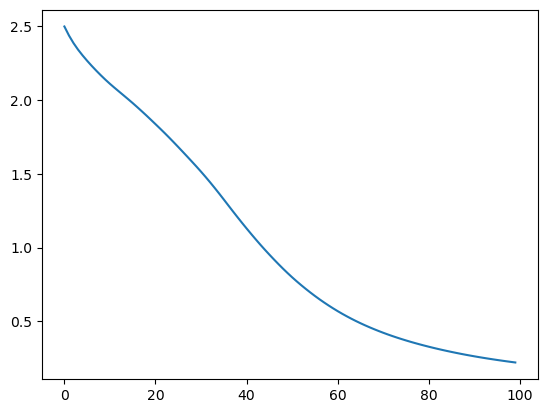

In [65]:
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    
    y_pred = net(x)
    
    loss = loss_fn(y_pred,y)
    loss.backward()
    
    
    optimizer.step()
    losses.append(loss.item())
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses)

In [102]:
from torch.utils.data import TensorDataset,DataLoader

In [126]:
ds = TensorDataset(x,y)


In [127]:
loader = DataLoader(ds,batch_size=164,shuffle=True)


In [128]:
net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [129]:
loss_fn = nn.CrossEntropyLoss()

In [130]:
optimizer = optim.Adam(net.parameters())

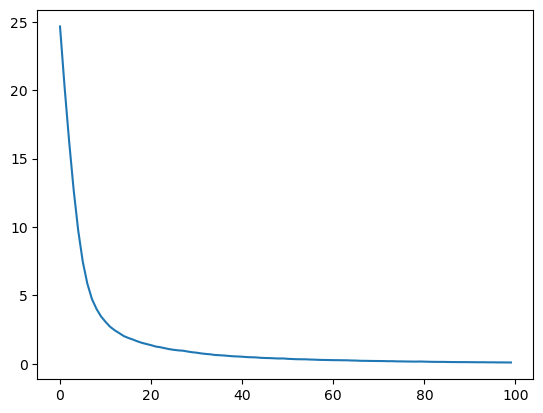

In [116]:
losses = []
for epoch in range(100):
    running_loss = 0
    for xx,yy in loader:
        y_pred = net(xx)
        loss = loss_fn(y_pred,yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    losses.append(running_loss)
plt.plot(losses)

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
x = digits.data
y = digits.target

In [229]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [230]:
x_train = torch.tensor(x_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.int64)
x_test = torch.tensor(x_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.int64)

In [232]:
net = nn.Sequential(
    nn.Linear(64,100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.BatchNorm1d(100),
    nn.Linear(100,100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.BatchNorm1d(100),
    nn.Linear(100,100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.BatchNorm1d(100),
    nn.Linear(100,10)
)

In [233]:
loss_fn = nn.CrossEntropyLoss()

In [234]:
optimizer = optim.Adam(net.parameters())

([<matplotlib.lines.Line2D at 0x20a6b9c8088>],
 [<matplotlib.lines.Line2D at 0x20a6b9d98c8>])

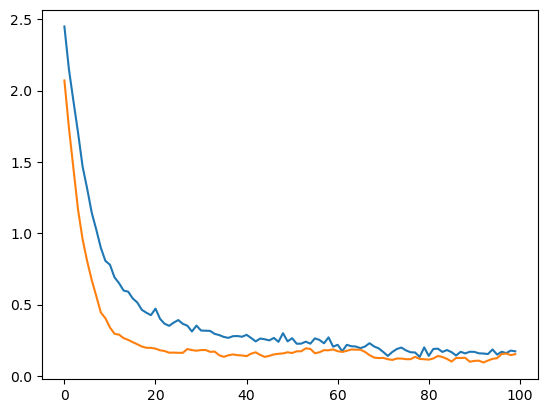

In [235]:
ds = TensorDataset(x_train,y_train)
loader = DataLoader(ds,batch_size=64,shuffle=True)
train_losses = []
test_losses = []
for epoch in range(100):
    loss_running = 0
    net.train()
    for i,(xx,yy) in enumerate(loader):
        y_pred = net(xx)
        loss = loss_fn(y_pred,yy)
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        loss_running += loss.item()
    train_losses.append(loss_running/i)
    net.eval()
    y_pred = net(x_test)
    test_loss = loss_fn(y_pred,y_test)
    test_losses.append(test_loss.item())
    
    
plt.plot(train_losses),plt.plot(test_losses)

In [240]:
class CustomLinear(nn.Module):
    def __init__(self,in_features,out_features,bias=True,p=0.5):
        super().__init__()
        self.linear = nn.Linear(in_features,
                           out_features,bias)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p)
    
    def forward(self,x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.drop(x)
        return x
    
mlp = nn.Sequential(
    CustomLinear(64,200),
    CustomLinear(200,200),
    CustomLinear(200,200),
    nn.Linear(200,10)
    )
    

In [241]:
class MyMLP(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.lin1 = CustomLinear(in_features,200)
        self.lin2 = CustomLinear(200,200)
        self.lin3 = CustomLinear(200,200)
        self.lin4 = CustomLinear(200,out_features)
        
    def forward(self,x):
        x = self.lin1(x)
        x = self.lin2(x)
        x = self.lin3(x)
        x = self.lin4(x)
        return x